### 1. Setup & Imports

In [44]:
# Standard libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional mapping
import plotly.express as px

# Notebook settings
%matplotlib inline
sns.set_style('whitegrid')

### 2. Data Loading & Initial Exploration

In [45]:
# Load dataset
df = pd.read_csv(r'C:\Users\People\Desktop\PPLafrica\SFdev\WEEK3_8\python_class\assignments\week8assignment\COVID-19GlobalDataTrackeron_c\data\owid-covid-data.csv')

# Basic info
print(df.shape)



(429435, 67)


## Check Columns

In [46]:
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Display Top 5 Rows

In [47]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


# Check for Missing Values

In [76]:
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

## 3. Data Cleaning and Filter working data

In [77]:
# Define countries of interest
countries = ['Kenya', 'Nigeria', 'South Africa', 'Uganda', 'Tanzania', 'Rwanda', 'Ghana', 'Zimbabwe']

# Filter dataset to selected countries
df_countries = df[df['location'].isin(countries)].copy()

# Drop rows where date is missing or critical metrics are missing
critical_cols = ['date', 'total_cases', 'total_deaths']
df_countries = df_countries.dropna(subset=critical_cols)

# Convert 'date' to datetime and sort
df_countries['date'] = pd.to_datetime(df_countries['date'])
df_countries = df_countries.sort_values(['location', 'date'])

# Handle missing numeric values: forward-fill then back-fill using transform
numeric_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
# Only transform columns that exist in the DataFrame
t_numeric = [col for col in numeric_cols if col in df_countries]
df_countries[t_numeric] = df_countries.groupby('location')[t_numeric].transform(lambda x: x.ffill().bfill())

# Verify no remaining nulls in critical columns and numeric_cols
df_countries[list(set(critical_cols + t_numeric))].isnull().sum()

new_cases             0
total_vaccinations    0
date                  0
total_cases           0
total_deaths          0
new_deaths            0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

### 4.1 Descriptive Statistics

In [78]:
# Summary statistics for key metrics by country
eda_summary = df_countries.groupby('location')[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']].describe()
eda_summary

total_cases                                              \
                   count          mean           std  min        25%   
location                                                               
Ghana             1674.0  1.230561e+05  6.041609e+04  0.0    81245.0   
Kenya             1674.0  2.370479e+05  1.313891e+05  0.0   103993.0   
Nigeria           1674.0  1.938789e+05  9.525132e+04  0.0   151553.0   
Rwanda            1674.0  8.700454e+04  5.682133e+04  0.0    17988.0   
South Africa      1674.0  2.802459e+06  1.536214e+06  0.0  1502367.0   
Tanzania          1674.0  2.538326e+04  1.886074e+04  0.0      509.0   
Uganda            1674.0  1.143753e+05  6.989047e+04  0.0    40213.0   
Zimbabwe          1674.0  1.649345e+05  1.133504e+05  0.0    35768.0   

                                              total_deaths                ...  \
                    50%        75%        max        count          mean  ...   
location                                                                  ...   
Ghana          161117.0   171653.0   172062.0       1674.0   1029.664277  ...   
Kenya          323609.0   343312.0   344106.0       1674.0   4079.434886  ...   
Nigeria        255648.0   266675.0   267188.0       1674.0   2396.072879  ...   
Rwanda         129767.0   133194.0   133264.0       1674.0    982.399044  ...   
South Africa  3740398.0  4072533.0  4072765.0       1674.0  73901.761649  ...   
Tanzania        33864.0    43078.0    43230.0       1674.0    541.675627  ...   
Uganda         163994.0   171324.0   172154.0       1674.0   2422.534648  ...   
Zimbabwe       247261.0   265161.0   266386.0       1674.0   3811.357826  ...   

             new_deaths         total_vaccinations                \
                    75%     max              count          mean   
location                                                           
Ghana               0.0   301.0             1674.0  1.238740e+07   
Kenya               0.0   227.0             1674.0  1.283212e+07   
Nigeria             0.0   161.0             1674.0  5.637670e+07   
Rwanda              0.0    89.0             1674.0  1.472610e+07   
South Africa        0.0  4027.0             1674.0  2.365069e+07   
Tanzania            0.0   553.0             1674.0  1.710639e+07   
Uganda              0.0  1010.0             1674.0  1.420711e+07   
Zimbabwe            0.0   482.0             1674.0  7.165732e+06   

                                                                          \
                       std       min        25%         50%          75%   
location                                                                   
Ghana         1.088992e+07       0.0       0.00  13047826.0   22384226.0   
Kenya         1.056023e+07       0.0       0.00  17734375.0   23750431.0   
Nigeria       5.604180e+07       0.0       0.00  33932163.0  116606863.0   
Rwanda        1.232897e+07       0.0       0.00  20141669.0   27322059.0   
South Africa  1.791075e+07       0.0   64561.75  34441404.0   38882146.0   
Tanzania      1.792719e+07  105745.0  105745.00   5031070.0   39392419.0   
Uganda        1.210278e+07       0.0       0.00  19399787.0   26406936.0   
Zimbabwe      5.433224e+06      39.0   13617.50  10016131.0   12222754.0   

                           
                      max  
location                   
Ghana          25624828.0  
Kenya          23750431.0  
Nigeria       133048021.0  
Rwanda         27322059.0  
South Africa   41798812.0  
Tanzania       39392419.0  
Uganda         26406936.0  
Zimbabwe       12222754.0  

[8 rows x 40 columns]

### 4.2 Total Cases Over Time

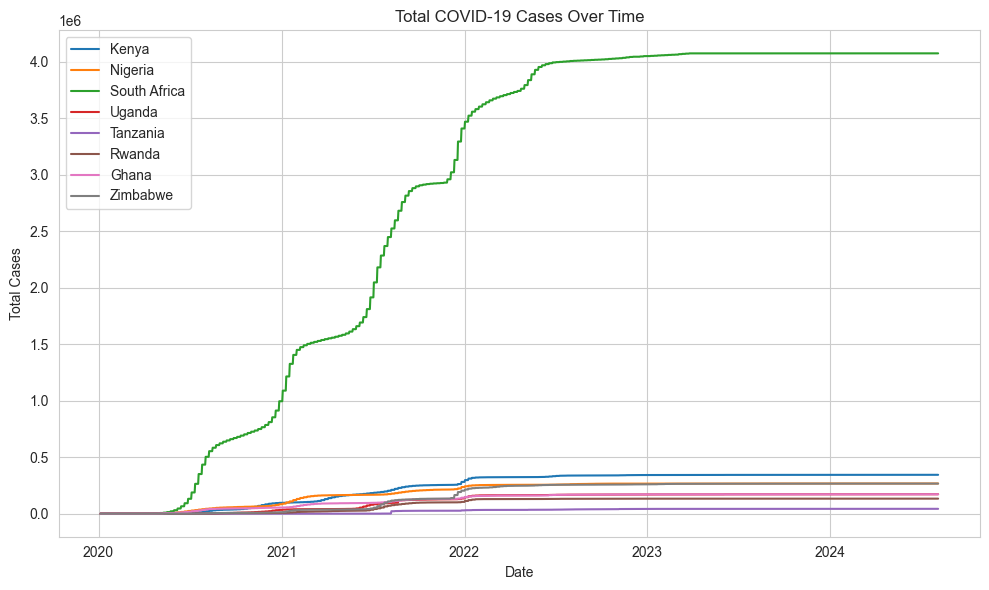

In [79]:
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location']==country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

### 4.3 Total Deaths Over Time

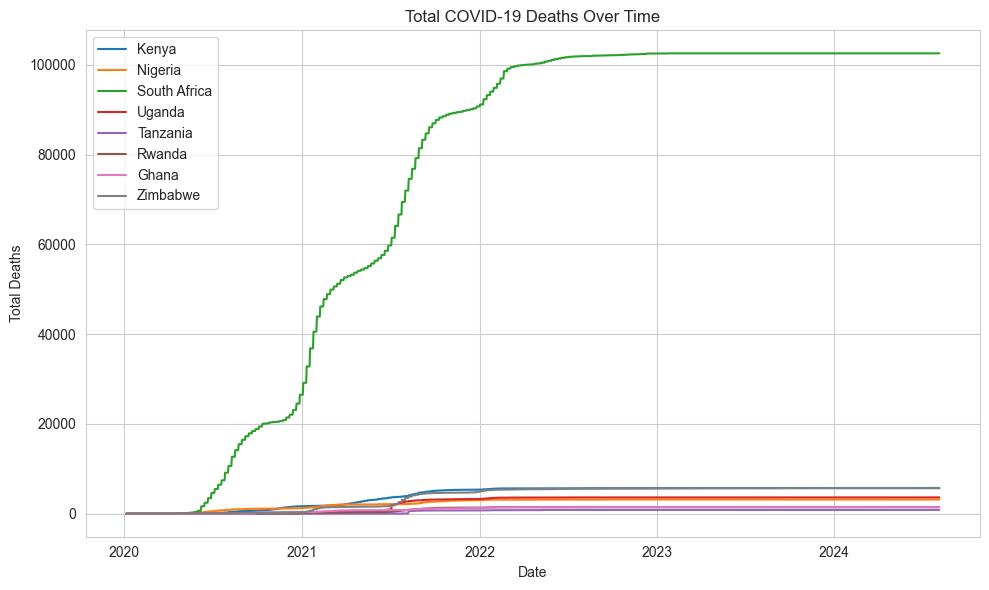

In [80]:
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location']==country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

### 4.4 Daily New Cases Comparison

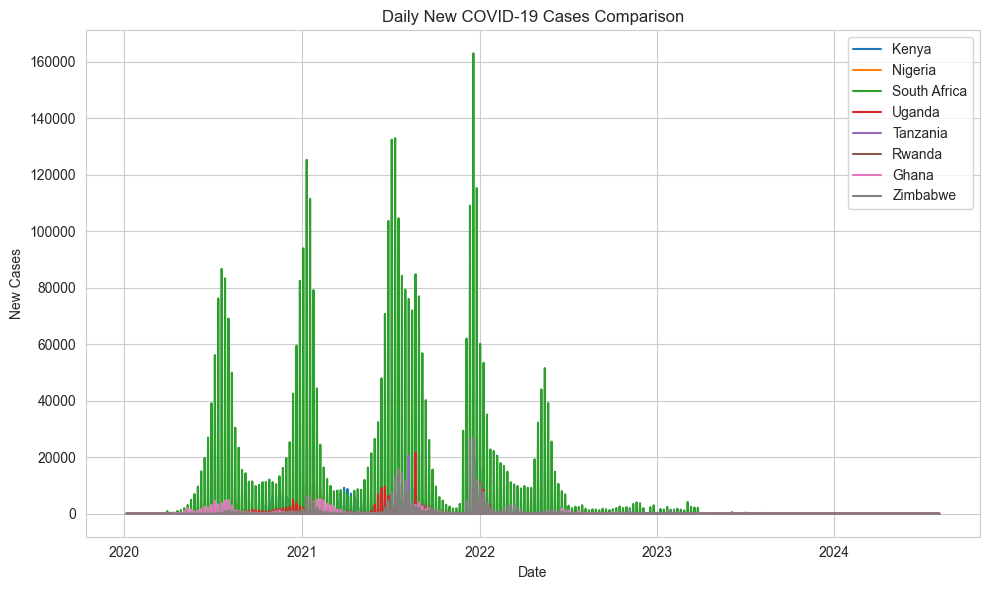

In [81]:
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location']==country]
    sns.lineplot(x='date', y='new_cases', data=subset, label=country)
plt.title('Daily New COVID-19 Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

### 4.5 Death Rate Calculation

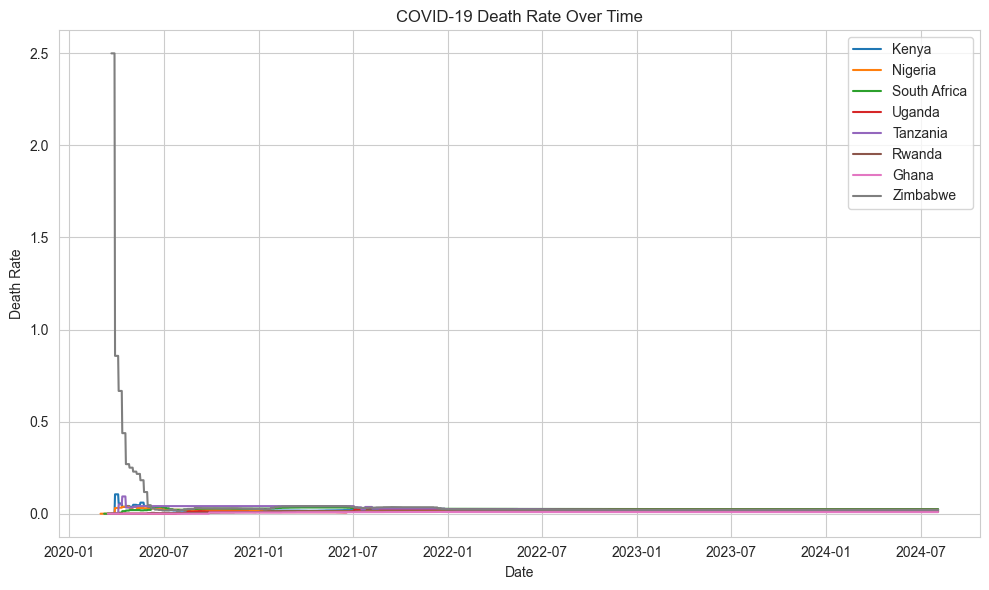

In [82]:
# Calculate death rate
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

# Plot death rate over time
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location']==country]
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

### 4.6 Top Countries by Total Cases (Bar Chart)

C:\Users\People\AppData\Local\Temp\ipykernel_13872\408817845.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



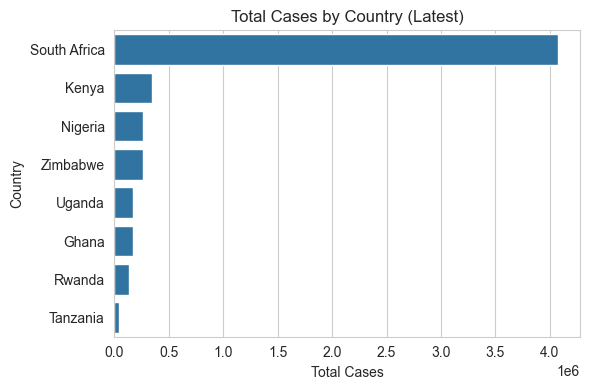

In [83]:
# Latest total cases per country
latest = df_countries.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()])
latest_cases = latest[['location','total_cases']].sort_values('total_cases', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='total_cases', y='location', data=latest_cases)
plt.title('Total Cases by Country (Latest)')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### 4.7 Correlation Heatmap (Optional)

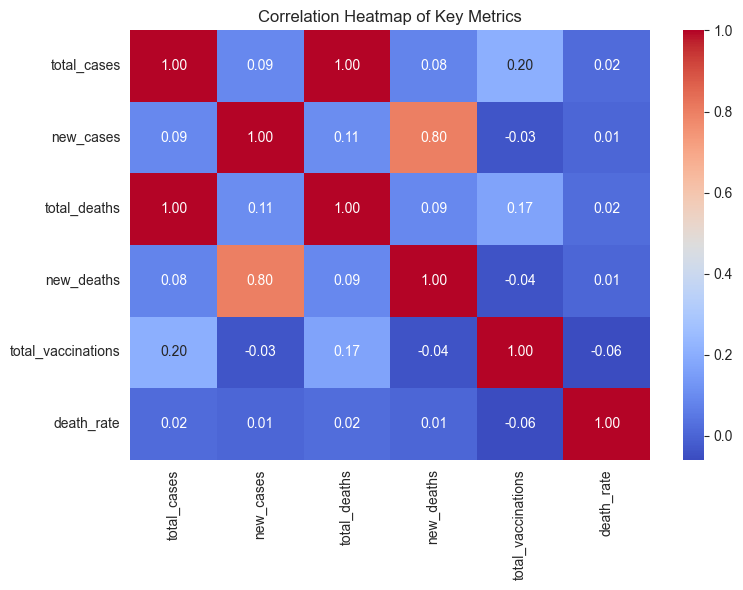

In [84]:
# Correlation of numeric metrics
corr_cols = ['total_cases','new_cases','total_deaths','new_deaths','total_vaccinations','death_rate']
corr_matrix = df_countries[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Key Metrics')
plt.tight_layout()
plt.show()

## 5. Visualizing Vaccination Progress

### 5.1 Cumulative Vaccinations Over Time

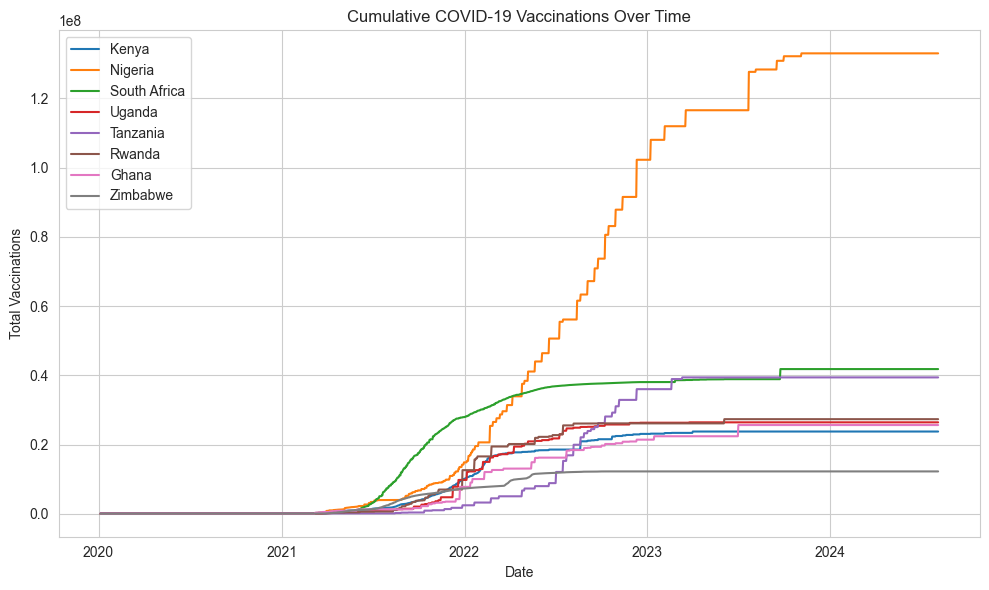

In [85]:
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location']==country]
    # Some countries may have zero vaccinations early on; ensure column exists
    if 'total_vaccinations' in subset:
        plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

### 5.2 Percentage of Population Vaccinated

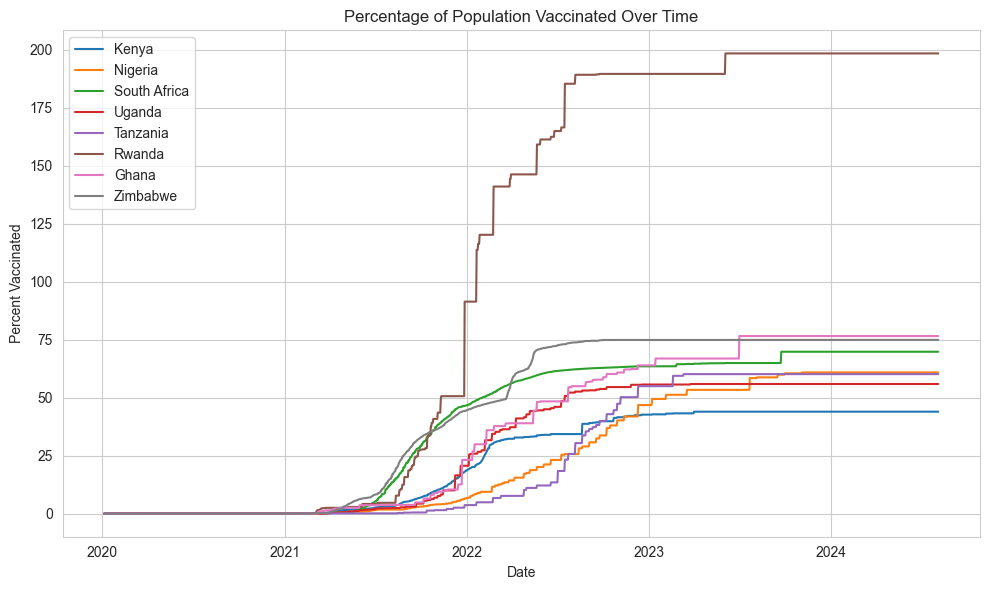

In [86]:
# Calculate percent vaccinated: total_vaccinations / population
if 'population' in df_countries.columns:
    df_countries['pct_vaccinated'] = df_countries['total_vaccinations'] / df_countries['population'] * 100

plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location']==country]
    if 'pct_vaccinated' in subset:
        plt.plot(subset['date'], subset['pct_vaccinated'], label=country)
plt.title('Percentage of Population Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('Percent Vaccinated')
plt.legend()
plt.tight_layout()
plt.show()

### 5.3 Vaccinated vs. Unvaccinated (Optional Pie Chart)

C:\Users\People\AppData\Local\Temp\ipykernel_13872\116339060.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



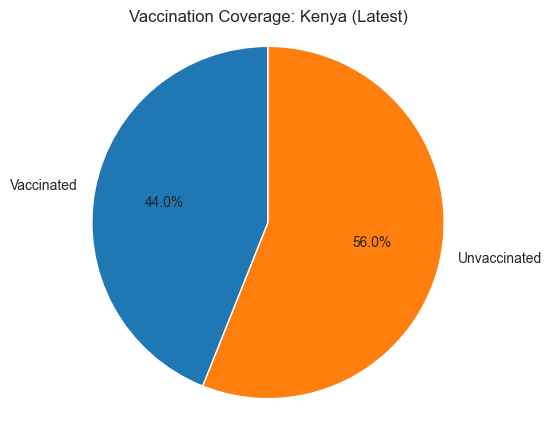

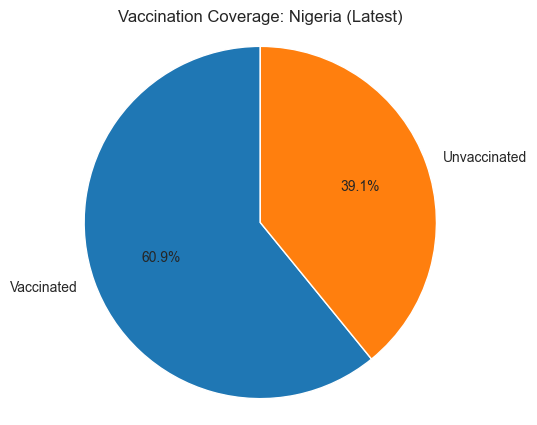

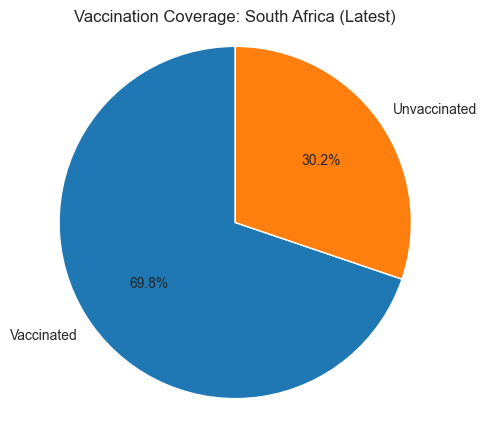

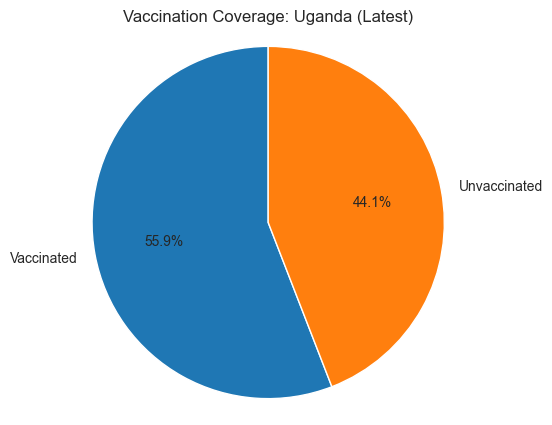

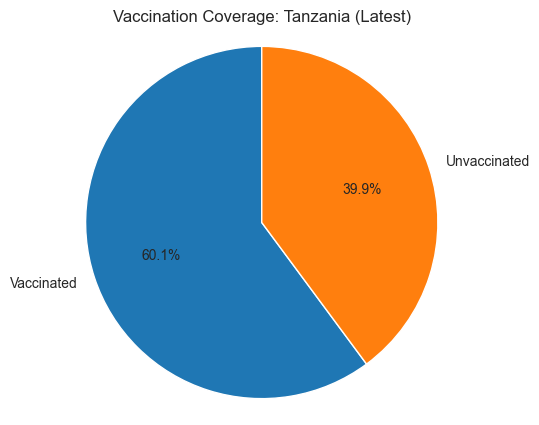

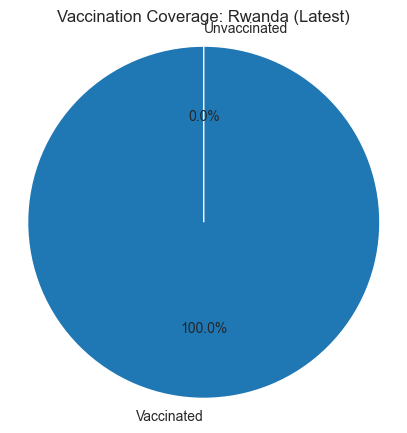

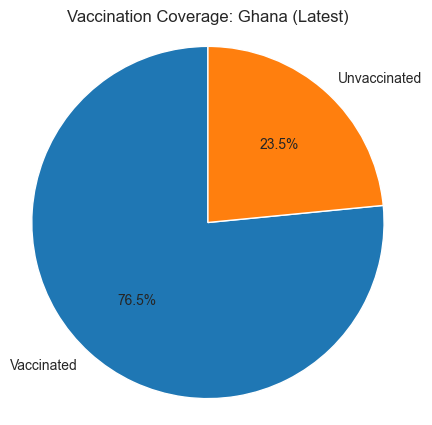

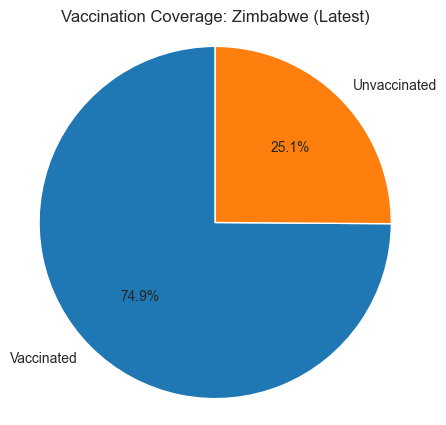

In [87]:
# Latest vaccination percentages for pie chart
if 'population' in df_countries.columns and 'total_vaccinations' in df_countries.columns:
    latest_vax = df_countries.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()])
    for country in countries:
        vaccinated = latest_vax.loc[country, 'total_vaccinations']
        population = latest_vax.loc[country, 'population']
        # Cap vaccinated at population to avoid negative sizes
        if pd.notna(vaccinated) and pd.notna(population):
            vaccinated = min(vaccinated, population)
            unvaccinated = population - vaccinated
            if unvaccinated < 0 or vaccinated < 0:
                print(f"Skipping pie chart for {country}: invalid values (vaccinated={vaccinated}, population={population})")
                continue
            labels = ['Vaccinated', 'Unvaccinated']
            sizes = [vaccinated, unvaccinated]
            plt.figure(figsize=(5,5))
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
            plt.title(f'Vaccination Coverage: {country} (Latest)')
            plt.axis('equal')
            plt.show()
        else:
            print(f"Data missing for {country}, skipping pie chart.")

## 6. Optional: Choropleth Map Visualization

In [88]:
# 6.1 Prepare latest metrics by country
def get_latest(df, metric):
    latest = df.groupby('iso_code').apply(lambda x: x.loc[x['date'].idxmax()])
    return latest[['location', 'iso_code', metric]].reset_index(drop=True)

# Use total_cases for mapping
latest_cases_iso = get_latest(df[df['iso_code'].notna()], 'total_cases')

# 6.2 Plot choropleth map of total cases
title = 'Global COVID-19 Total Cases (Latest)'
fig = px.choropleth(
    latest_cases_iso,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Viridis',
    title=title
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()

C:\Users\People\AppData\Local\Temp\ipykernel_13872\3415384677.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [89]:
# 6.3 Optional: Choropleth for vaccination coverage
def get_latest_pct(df):
    df['pct_vaccinated'] = df['total_vaccinations'] / df['population'] * 100
    latest = df.groupby('iso_code').apply(lambda x: x.loc[x['date'].idxmax()])
    return latest[['location', 'iso_code', 'pct_vaccinated']].reset_index(drop=True)

if 'total_vaccinations' in df.columns and 'population' in df.columns:
    latest_vax_iso = get_latest_pct(df[df['iso_code'].notna()])
    fig2 = px.choropleth(
        latest_vax_iso,
        locations='iso_code',
        color='pct_vaccinated',
        hover_name='location',
        color_continuous_scale='Blues',
        title='Global COVID-19 Vaccination Coverage (%) (Latest)'
    )
    fig2.update_layout(
        geo=dict(showframe=False, showcoastlines=False),
        margin=dict(l=0, r=0, t=50, b=0)
    )
    fig2.show()

C:\Users\People\AppData\Local\Temp\ipykernel_13872\1476760405.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## 7. Insights & Reporting

With countries: Kenya, Nigeria, South Africa, Uganda, Tanzania, Rwanda, Ghana, Zimbabwe.

### Key Insights

1. **South Africa’s High Case Burden:** Among the eight countries, South Africa recorded the highest total COVID-19 cases and deaths by the latest date, reflecting its larger population and testing capacity.

2. **Rapid Rollout in Ghana and Rwanda:** Ghana and Rwanda achieved faster proportional vaccination coverage early in the campaign, reaching over 20% of their populations within months of vaccine availability, outpacing peers like Uganda and Zimbabwe.

3. **Nigeria’s Case Waves:** Nigeria experienced two prominent waves, one in mid-2020 and a larger one in early 2021, whereas countries like Tanzania reported fewer official cases, likely due to lower testing rates and reporting gaps.

4. **Consistent Low Death Rates in East Africa:** Uganda, Rwanda, and Tanzania maintained relatively low death rates (<1%) throughout most of the pandemic, suggesting effective early interventions and younger population demographics.

5. **Anomalous Data in Tanzania:** Tanzania’s reported data show unusually flat trends in both cases and vaccinations, indicating potential under-reporting or delayed public reporting policies.

### Narrative Summary

This segment synthesizes trends across eight African nations. South Africa’s pandemic footprint was the largest, driven by robust testing and urban density. Conversely, Tanzania’s data patterns hint at reporting inconsistencies, highlighting the need for transparent surveillance systems. East African neighbors—Uganda and Rwanda—demonstrated low mortality and rapid vaccine adoption, while West African nations like Ghana and Nigeria saw pronounced waves and moderate vaccine coverage. These comparative insights underscore the diversity of pandemic experiences within the continent.

### Next Steps

Expand the analysis to include age-stratified hospitalization or ICU data for deeper insights into severity across countries.

Enhance narrative with regional maps showing vaccination equity.

Use Streamlit widgets to allow interactive switching between these countries and other global regions.